<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Прогнозирование-оттока-клиентов-оператора-связи" data-toc-modified-id="Прогнозирование-оттока-клиентов-оператора-связи-1">Прогнозирование оттока клиентов оператора связи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-датасетов-и-анализ-первичной-информации" data-toc-modified-id="Загрузка-датасетов-и-анализ-первичной-информации-1.1.1">Загрузка датасетов и анализ первичной информации</a></span></li><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-1.1.2">Переименование столбцов</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-1.1.3">Удаление дубликатов</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-1.1.4">Объединение таблиц</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.1.5">Анализ признаков</a></span></li><li><span><a href="#Кодирование-переменных" data-toc-modified-id="Кодирование-переменных-1.1.6">Кодирование переменных</a></span></li><li><span><a href="#Удаление-столбцов" data-toc-modified-id="Удаление-столбцов-1.1.7">Удаление столбцов</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-1.1.8">Корреляция признаков</a></span></li><li><span><a href="#Разбивка-данных-на-выборки" data-toc-modified-id="Разбивка-данных-на-выборки-1.1.9">Разбивка данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.1.10">Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2">Вывод</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-1.3">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-1.3.1">Логистическая регрессия</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-1.3.2">Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-1.3.3">Модель случайного леса</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-1.3.4">CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-1.3.5">LightGBM</a></span></li><li><span><a href="#Влияние-признаков" data-toc-modified-id="Влияние-признаков-1.3.6">Влияние признаков</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4">Вывод</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-1.5">Анализ моделей</a></span></li><li><span><a href="#Основные-результаты" data-toc-modified-id="Основные-результаты-1.6">Основные результаты</a></span></li></ul></li></ul></div>

# Прогнозирование оттока клиентов оператора связи

Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. В наличии имеются персональные данные о некоторых клиентах, информация об их тарифах и договорах.

Для решения задачи требуется:

- подготовить данные;
- провести исследовательский анализ данных;
- построить и обучить модель с максимально большим значением ROC-AUC (приемлемым будет результат не ниже 0,75, целевым - выше 0,88). В качестве вторичной метрики использовать accuracy.

## Подготовка данных

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import time
from scipy import stats as st
import datetime as dt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score, roc_curve, recall_score, precision_score, f1_score 
import warnings
warnings.filterwarnings('ignore')

### Загрузка датасетов и анализ первичной информации

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option("display.max_columns", None)

Рассмотрим каждый из датасетов.

**Таблица contract — информация о договоре**:

In [4]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Общая информация:

In [5]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


В датафрейме **contract** представлена информация о договорах клиентов: 

- **customerID** — уникальный идентификатор клиента;
- **BeginDate** — дата открытия договора;
- **EndDate** — дата закрытия договора;
- **Type** — тип договора;
- **PaperlessBilling** — безналичный расчет;
- **PaymentMethod** — способ оплаты;
- **MonthlyCharges** — ежемесячные траты на услуги;
- **TotalCharges** — сумма комиссий за весь срок действия договора.

Общее количество договоров - 7 043, пропусков в данных нет.

---

**Таблица personal — персональные данные клиента**:

In [6]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Общая информация:

In [7]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


В датафрейме **personal** содержится информация о персональных данных клиентов: 

- **customerID** — уникальный идентификатор клиента;
- **gender** — пол;
- **SeniorCitizen** — наличие пенсионного статуса по возрасту;
- **Partner** — наличие супруга;
- **Dependents** — наличие иждивенцев.

Общее количество записей - 7 043, пропусков нет.

---

**Таблица internet — информация об интернет-услугах**:

In [8]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Общая информация:

In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Датафрейм **internet** содержит информацию об интернет-услугах клиентов: 

- **customerID** — уникальный идентификатор клиента;
- **InternetService** — тип подключения;
- **OnlineSecurity** — блокировка небезопасных сайтов;
- **OnlineBackup** — облачное хранилище файлов для резервного копирования данных;
- **DeviceProtection** — антивирус;
- **TechSupport** — выделенная линия технической поддержки;
- **StreamingTV** — стриминговое телевидение;
- **StreamingMovies** — каталог фильмов.

Общее количество записей - 5 517, пропусков нет.

---

**Таблица phone — информация об услугах телефонии**:

In [10]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Общая информация:

In [11]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Датасет **phone** состоит из двух столбцов: 

- **customerID** — уникальный идентификатор клиента;
- **MultipleLines** — подключен ли телефонный аппарат к нескольким линиям одновременно.

Суммарное число записей - 6 361, пропусков нет.

---

Подготовим исходные данные для дальнейшего исседования и построения прогноза.

### Переименование столбцов

Переименуем столбцы в соответствии с общепринятой практикой:

In [12]:
# функция принимает на вход строку и ставит перед каждой заглавной буквой, кроме первой, символ "_", 
# после чего приводит все буквы к нижнему регистру

def convert(string):
    return re.sub( '(?<!^)(?=[A-Z])', '_', string).lower()

Применим функцию ко всем колонкам, предварително переименовав столбцы **clientID** и **StreamingTV** чтобы между заглавными буквами не было лишнего символа '_'.

In [13]:
contract = contract.rename(columns= {'customerID' : 'customer_id'})
contract = contract.rename(columns = lambda x: convert(x))
personal = personal.rename(columns= {'customerID' : 'customer_id'})
personal = personal.rename(columns = lambda x: convert(x))
internet = internet.rename(columns= {'customerID' : 'customer_id', 'StreamingTV' : 'streaming_tv'})
internet = internet.rename(columns = lambda x: convert(x))
phone = phone.rename(columns= {'customerID' : 'customer_id'})
phone = phone.rename(columns = lambda x: convert(x))

Столбцы переименованы.

### Удаление дубликатов

Проверим таблицы на наличие полностью повторяющихся строк:

In [14]:
display(contract.duplicated().sum())
display(personal.duplicated().sum())
display(internet.duplicated().sum())
display(phone.duplicated().sum())

0

0

0

0

Полных дубликатов в данных нет. 

### Объединение таблиц

Датасеты содержат информацию о разном количестве клиентов: таблицах *internet* и *phone* строк меньше. Проверим, пересекаются ли множества клиентов.

Сначала убедимся, что ни в одной из таблиц нет дубликатов в столбцах с ID клиента: 

In [15]:
display(contract['customer_id'].duplicated().sum())
display(personal['customer_id'].duplicated().sum())
display(internet['customer_id'].duplicated().sum())
display(phone['customer_id'].duplicated().sum())

0

0

0

0

Таким образом, ошибочных записей, где одному и тому же клиенту присвоены разные договоры или сведения об используемых услугах, нет.

Теперь посмотрим на пересечения таблиц:

In [16]:
display(personal.query('customer_id not in @contract.customer_id').shape[0])
display(contract.query('customer_id not in @personal.customer_id').shape[0])

0

0

Все клиенты из таблицы *personal* встречаются в таблице *contract* и наоборот, то есть список клиентов в них одинаковый.

In [17]:
display(internet.query('customer_id not in @contract.customer_id').shape[0])
display(contract.query('customer_id not in @internet.customer_id').shape[0])

0

1526

В таблице *contract* содержатся все клиенты из таблицы *internet*, но в таблице *internet* нет информации о 1 526 клиентах из таблицы *contract*. Такая же ситуация и с датасетом *phone* (в нем на 682 записи меньше):

In [18]:
display(phone.query('customer_id not in @contract.customer_id').shape[0])
display(contract.query('customer_id not in @phone.customer_id').shape[0])

0

682

По условию отсутствие записей о той или иной услуге означает то, что клиент ей вообще не пользуется. Таким образом, можно объединить все таблицы в одну, заполнив нулями отсутствующие значения.

In [19]:
df = contract.merge(personal, on = 'customer_id', how = 'inner')
df = df.merge(internet, on = 'customer_id', how = 'left')
df = df.merge(phone, on = 'customer_id', how = 'left')

Проверим, что при объединении таблиц данные не потерялись:

In [20]:
df.shape

(7043, 20)

Число строк соответствет таблице *contract* с максимальным количеством записей. Число столбцов - суммарное количество уникальных столбцов во всех датафреймах.

Заполним пропуски, означающие, что клиент не пользуется услугой (в столбце **multiple_lines** требуется отдельное значение, т.к. стандартное для остальной части датафрейма "No" означает, что человек пользуется только одной телефонной линией):

In [21]:
df['multiple_lines'] = df['multiple_lines'].fillna('No_phone')
df = df.fillna('No')

In [22]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No_phone
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No_phone
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


### Анализ признаков

Теперь рассмотрим отдельно каждый столбец на предмет наличия ошибок в данных, аномалий и пр.

##### begin_date — дата открытия договора

In [23]:
df['begin_date'] = pd.to_datetime(df['begin_date'])

In [24]:
df['begin_date'].describe()

count                    7043
unique                     77
top       2014-02-01 00:00:00
freq                      366
first     2013-10-01 00:00:00
last      2020-02-01 00:00:00
Name: begin_date, dtype: object

Клиенты заключали договоры в промежутке с 01.10.2013 по 01.02.2020.

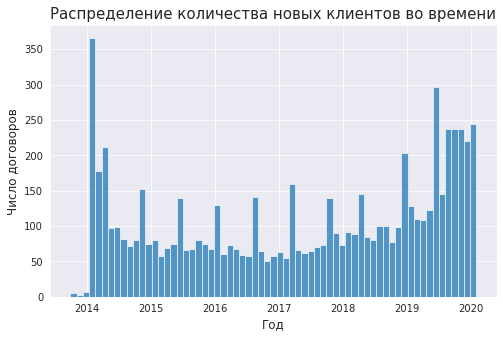

In [25]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
fig = sns.histplot(df['begin_date'], bins = 65)
fig.set_title("Распределение количества новых клиентов во времени", fontsize = 15)
fig.set_xlabel("Год", fontsize = 12)
fig.set_ylabel("Число договоров", fontsize = 12)
plt.show()

Количество столбцов на гистограмме соответствует количеству месяцев в рассматриваемом промежутке. Основная масса договоров была заключена в начале 2014 года и в 2019 году. С 2017 г. наблюдается тренд на повышение с существенным приростом в конце 2019 - начале 2020 гг. Имеет место сезонность: выделяются месяцы, в которых количество договоров вдвое выше, чем в соседние.

##### end_date — дата закрытия договора

В этом столбце встречаются не только даты, но и отметки "No", указывающие на то, что договор клиента все еще действует. По сути, это аналог целевой переменной. Если договор прекращен, клиент попал в отток. 

Посмотрим на распределение:

In [26]:
df['end_date'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

Таким образом, 5 174 договора действуют. Время закрытия все остальных - с 01.10.2019 по 01.01.2020. Число закрывшихся договоров от месяца к месяцу существенно не меняется.

Создадим новый столбец **churn**, показывающий, попал ли клиент в отток:

In [27]:
df['churn'] = np.where(df['end_date'] == "No", 0, 1)

In [28]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No_phone,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No_phone,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,1


Также для предварительного анализа разделим клиентов на группы с оттоком и без:

In [29]:
churn_clients = df.query('churn == 1')
nonchurn_clients = df.query('churn == 0')

In [30]:
print('Клиентов в оттоке: ', churn_clients.shape[0], ' (', round(churn_clients.shape[0] / contract.shape[0] * 100, 2), '%)', sep = '')
print('Клиентов не в оттоке: ', nonchurn_clients.shape[0], ' (', round(nonchurn_clients.shape[0] / contract.shape[0] * 100, 2), '%)', sep = '')

Клиентов в оттоке: 1869 (26.54%)
Клиентов не в оттоке: 5174 (73.46%)


Четверть клиентов оператора находится в оттоке.

##### type — тип договора

In [31]:
df['type'].value_counts(normalize = True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: type, dtype: float64

55% клиентов заключили договор на неопределенный срок, 24% - двухлетний, 21% - на один год.

Посмотрим распределение в группах с оттоком и без:

In [32]:
ctype_c = churn_clients.groupby(by = 'type').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
ctype_nc = nonchurn_clients.groupby(by = 'type').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

In [33]:
#вспомогательная функция для отображения процентов на графике
#принимает на вход название графика, сдвиг надписи по горизонтали и по вертикали

def show_percent(figure, shift, height):
    totals = []
    for i in figure.patches:
        totals.append(i.get_height())
    
    total = sum(totals)

    for i in figure.patches:
        figure.text(i.get_x() + shift, i.get_height() + height, \
            str(round((i.get_height() / total) * 100, 2)) + '%', fontsize=12,
                color = 'black')

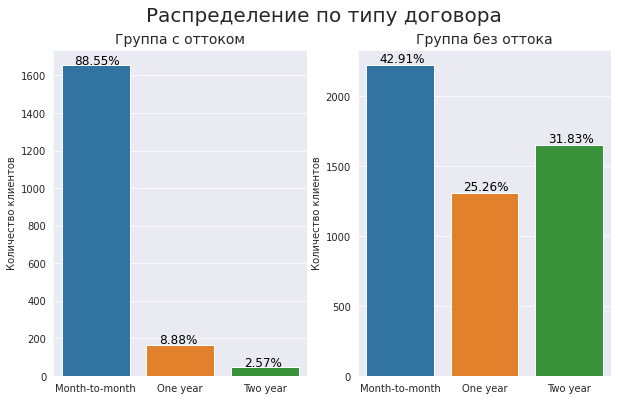

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Распределение по типу договора', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "type", y = "n", data = ctype_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.15, 5)

fig2 = sns.barplot(ax = axes[1], x = "type", y = "n", data = ctype_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.15, 20)

plt.show()

В группе с оттоком преимущественно заключался бессрочный договор. В группе без оттока существенно выше доли двух- и однолетних договоров.

##### paperless_billing — безналичный расчет

In [35]:
df['paperless_billing'].value_counts(normalize = True)

Yes    0.592219
No     0.407781
Name: paperless_billing, dtype: float64

59% клиентов рассчитывались безналично.

In [36]:
pb_c = churn_clients.groupby(by = 'paperless_billing').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
pb_nc = nonchurn_clients.groupby(by = 'paperless_billing').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

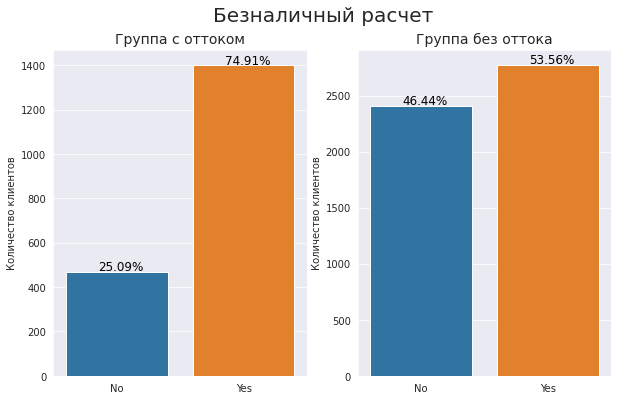

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Безналичный расчет', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "paperless_billing", y = "n", data = pb_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "paperless_billing", y = "n", data = pb_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком в 75% случаев расчеты проходили безналично. В группе без оттока всего лишь 53,5%.

##### payment_method — способ оплаты

In [38]:
df['payment_method'].value_counts(normalize = True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: payment_method, dtype: float64

33% делают оплату по электронному чеку, 23% - бумажным чеком, 22% - банковским переводом и 21% - банковской картой.

In [39]:
pm_c = churn_clients.groupby(by = 'payment_method').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
pm_nc = nonchurn_clients.groupby(by = 'payment_method').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

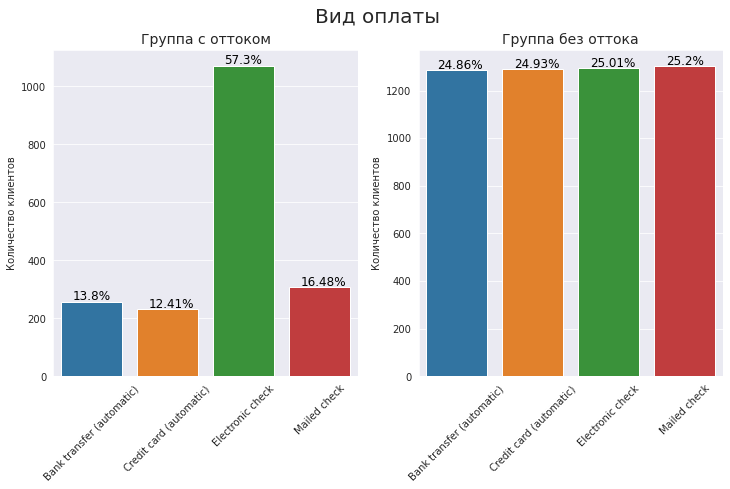

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Вид оплаты', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "payment_method", y = "n", data = pm_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45)
show_percent(fig1, 0.15, 5)

fig2 = sns.barplot(ax = axes[1], x = "payment_method", y = "n", data = pm_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=45)
show_percent(fig2, 0.15, 5)

plt.show()

В группе с оттоком более половины клиентов оплачивают услуги с помощью электронного чека. В группе без оттока все виды оплат встречаются с одинаковой частотой.

##### monthly_charges — размер ежемесячной абонентской платы

In [41]:
df['monthly_charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

Минимальный размер ежемесячной платы - 18,25 у.е., максимальный - 118,75 у.е. Среднее значение - 64,76 у.е., медиана - 70,35 у.е. Все значения выглядят адекватно, аномалий не наблюдается.

Построим график распределения:

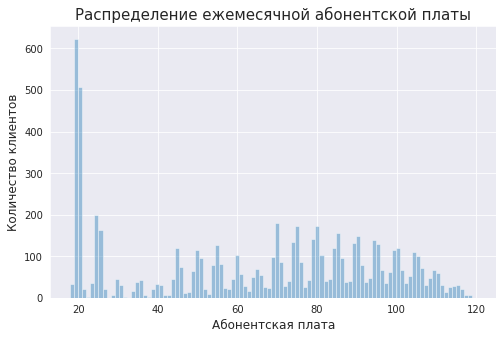

In [42]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
fig = sns.distplot(contract['monthly_charges'], kde = False, bins = np.linspace(start = 18, stop = 120, num = 102))
fig.set_title("Распределение ежемесячной абонентской платы", fontsize = 15)
fig.set_xlabel("Абонентская плата", fontsize = 12)
fig.set_ylabel("Количество клиентов", fontsize = 12)

plt.show()

Распределение визуально можно разложить на два: в левой части графика находится довольно большое количество клиентов, платящих по тарифам, близким к минимальному. В правой части распределение гладкое, тарифы находятся в промежутке примерно от 40 до 120 у.е. со средним 80 у.е.

Среднее значение признака **monthly_charges** выше в группе с оттоком:

In [43]:
churn_clients['monthly_charges'].mean().round(2)

74.44

In [44]:
nonchurn_clients['monthly_charges'].mean().round(2)

61.27

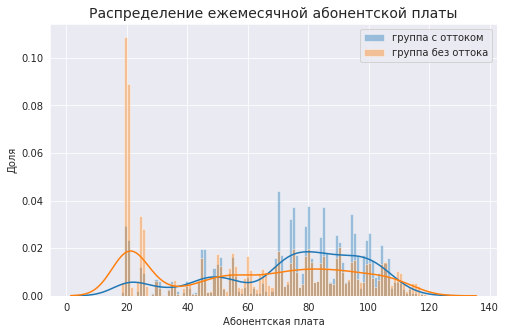

In [45]:
plt.figure(figsize=(8, 5))
fig1 = sns.distplot(churn_clients['monthly_charges'], kde = True, \
                    bins = np.linspace(start = 18, stop = 120, num = 102), label = 'группа с оттоком') 
fig2 = sns.distplot(nonchurn_clients['monthly_charges'], kde = True, \
                    bins = np.linspace(start = 18, stop = 120, num = 102), label = 'группа без оттока')  
fig2.set_title("Распределение ежемесячной абонентской платы", fontsize = 14)
fig2.set_ylabel("Доля", fontsize = 10)
fig2.set_xlabel("Абонентская плата")
plt.legend()
plt.show()

В группе без оттока больше клиентов с минимальными значениями абонентской платы. Напротив, доля пользователей с самыми высокими тарифами выше в группе с оттоком.

##### total_charges — сумма комиссий за весь срок действия договора

Столбец имеет строковый тип, а при попытке привести его к float появляется сообщение об ошибке. В столбце есть несколько неявных пропусков там, где значения заполнены пробелами:

In [46]:
customers_to_delete = df.query('total_charges == " "')

In [47]:
customers_to_delete

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,churn
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No_phone,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,No,No,No,No,No,No,No,No,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No_phone,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,No,No,No,No,No,No,No,No,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,No,No,No,No,No,No,No,No,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,No,No,No,No,No,No,No,No,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0


Предположительно, пропуски связаны с тем, что указанные клиенты еще не успели ни разу заплатить оператору, так как заключили договор в феврале 2020 г., а информация актуальна как раз на эту дату. Вообще говоря, не совсем корректно использовать указанных клиентов для предсказания оттока, так как они еще не успели поработать с оператором. Запишем id таких клиентов и удалим их из всех таблиц (записей всего 11, поэтому на результаты это не повлияет).

In [48]:
df = df.query('customer_id not in @customers_to_delete.customer_id')
churn_clients = churn_clients.query('customer_id not in @customers_to_delete.customer_id')
nonchurn_clients = nonchurn_clients.query('customer_id not in @customers_to_delete.customer_id')

Теперь поменяем тип данных и исследуем признак:

In [49]:
df['total_charges'] = df['total_charges'].astype(float)
churn_clients['total_charges'] = churn_clients['total_charges'].astype(float)
nonchurn_clients['total_charges'] = nonchurn_clients['total_charges'].astype(float)

In [50]:
df['total_charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64

Минимальный размер суммарного дохода от клиента составляет 18,8 у.е., максимальный - 8 684,8 у.е. Среднее значение - 2 283,3 у.е., медиана - 1397 у.е. Все значения адекватны.

Построим график распределения:

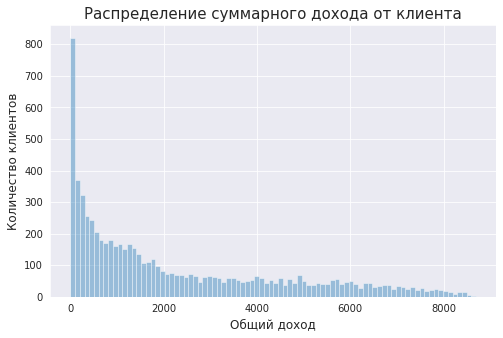

In [51]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
fig = sns.distplot(df['total_charges'], kde = False, bins = np.linspace(start = 0, stop = 8700, num = 87))
fig.set_title("Распределение суммарного дохода от клиента", fontsize = 15)
fig.set_xlabel("Общий доход", fontsize = 12)
fig.set_ylabel("Количество клиентов", fontsize = 12)

plt.show()

Более 800 клиентов принесли оператору доход 100 и менее у.е. Распределение резко убывает, выбросов нет.

Среднее значение признака **total_charges** существенно выше в группе без оттока:

In [52]:
churn_clients['total_charges'].mean().round(2)

1531.8

In [53]:
nonchurn_clients['total_charges'].mean().round(2)

2555.34

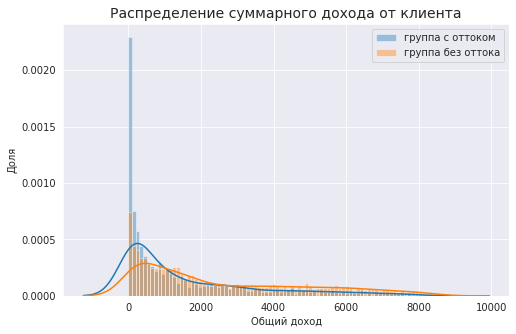

In [54]:
plt.figure(figsize=(8, 5))
fig1 = sns.distplot(churn_clients['total_charges'], kde = True, \
                    bins = np.linspace(start = 0, stop = 8700, num = 87), label = 'группа с оттоком') 
fig2 = sns.distplot(nonchurn_clients['total_charges'], kde = True, \
                    bins = np.linspace(start = 0, stop = 8700, num = 87), label = 'группа без оттока')  
fig2.set_title("Распределение суммарного дохода от клиента", fontsize = 14)
fig2.set_ylabel("Доля", fontsize = 10)
fig2.set_xlabel("Общий доход")
plt.legend()
plt.show()

В группе с оттоком значительно выше доля клиентов с минимальными значениями суммарного дохода. Правый хвост графика выше у группы без оттока, что объясняет и более высокое среднее значение.

##### gender — пол

In [55]:
df['gender'].value_counts(normalize = True)

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

Мужчин в выборке на 0,9% больше.

In [56]:
gen_c = churn_clients.groupby(by = 'gender').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
gen_nc = nonchurn_clients.groupby(by = 'gender').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

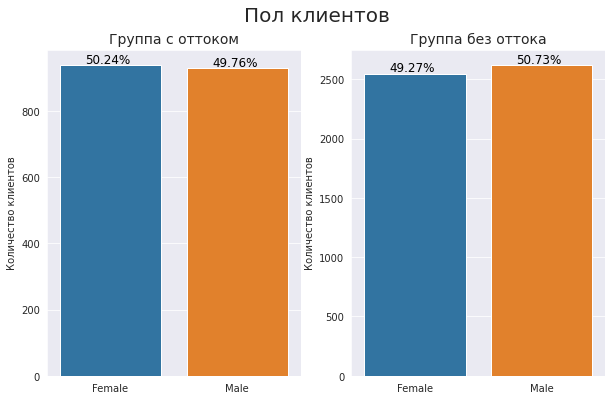

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Пол клиентов', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "gender", y = "n", data = gen_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.20, 5)

fig2 = sns.barplot(ax = axes[1], x = "gender", y = "n", data = gen_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.20, 20)

plt.show()

Пропорции между группами отличаются на 1%. В группе с оттоком женщин 50,2%, а в группе без оттока - 49,2%.

##### senior_citizen — наличие пенсионного статуса по возрасту

In [58]:
df['senior_citizen'].value_counts(normalize = True)

0    0.8376
1    0.1624
Name: senior_citizen, dtype: float64

Пенсионеров в выборке чуть более 16%.

In [59]:
sen_c = churn_clients.groupby(by = 'senior_citizen').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
sen_nc = nonchurn_clients.groupby(by = 'senior_citizen').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

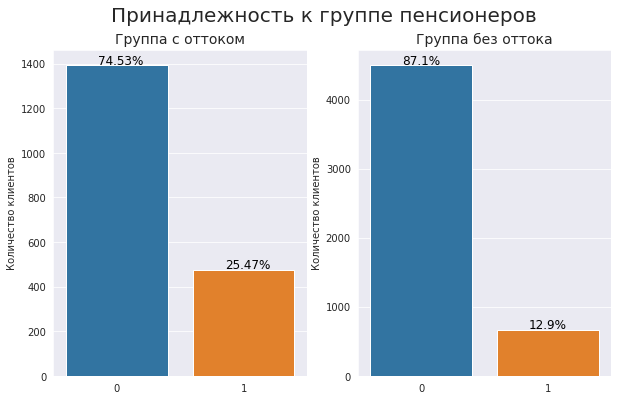

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Принадлежность к группе пенсионеров', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "senior_citizen", y = "n", data = sen_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "senior_citizen", y = "n", data = sen_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком доля пенсионеров выше: 25,5% против 12,9% в группе без оттока. 

##### partner — наличие супруга

In [61]:
df['partner'].value_counts(normalize = True)

No     0.517491
Yes    0.482509
Name: partner, dtype: float64

У 52% клиентов супруга нет.

In [62]:
partn_c = churn_clients.groupby(by = 'partner').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
partn_nc = nonchurn_clients.groupby(by = 'partner').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

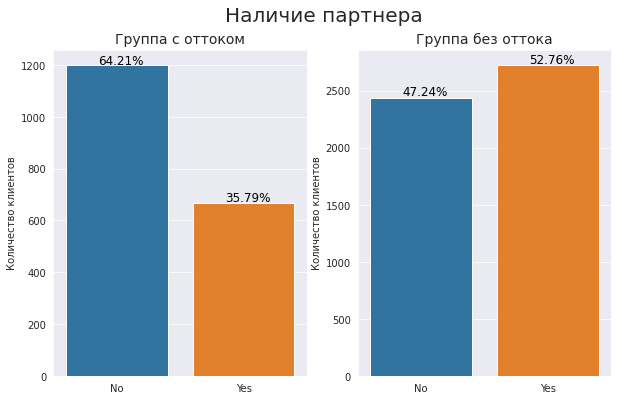

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Наличие партнера', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "partner", y = "n", data = partn_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "partner", y = "n", data = partn_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком в у 64% клиентов супруга нет. В группе без оттока не имеет супруга всего 47%.

##### dependents — наличие иждивенцев

In [64]:
df['dependents'].value_counts(normalize = True)

No     0.701507
Yes    0.298493
Name: dependents, dtype: float64

У 70% клиентов иждивенцев нет.

In [65]:
dep_c = churn_clients.groupby(by = 'dependents').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
dep_nc = nonchurn_clients.groupby(by = 'dependents').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

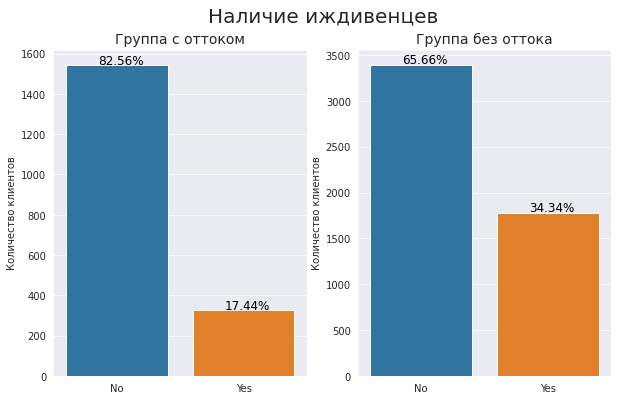

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Наличие иждивенцев', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "dependents", y = "n", data = dep_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "dependents", y = "n", data = dep_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком у 82,5% клиентов есть иждивенцы. В группе без оттока доля таких пользователей лишь 65,7%.

##### internet_service — тип подключения

In [67]:
df['internet_service'].value_counts(normalize = True)

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: internet_service, dtype: float64

У 44% клиентов оптоволоконное подключение, у 34,4% - DSL, 21,6% не пользуются услугой.

In [68]:
type_c = churn_clients.groupby(by = 'internet_service').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
type_nc = nonchurn_clients.groupby(by = 'internet_service').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

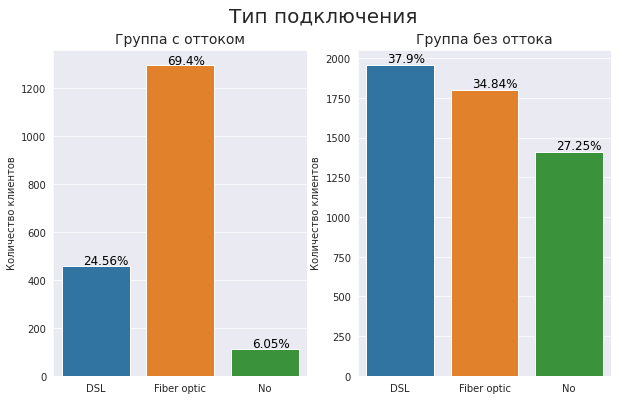

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Тип подключения', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "internet_service", y = "n", data = type_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "internet_service", y = "n", data = type_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком у основной массы (69,4%) оптоволоконное подключение. В группе без оттока, напротив, выше доля DSL (37,9%), а также значительное число клиентов, не пользующихся интернетом.

##### online_security — блокировка небезопасных сайтов

In [70]:
df['online_security'].value_counts(normalize = True)

No     0.713453
Yes    0.286547
Name: online_security, dtype: float64

71% пользователей не подключал услугу блокировки небезопасных сайтов.

In [71]:
os_c = churn_clients.groupby(by = 'online_security').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
os_nc = nonchurn_clients.groupby(by = 'online_security').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

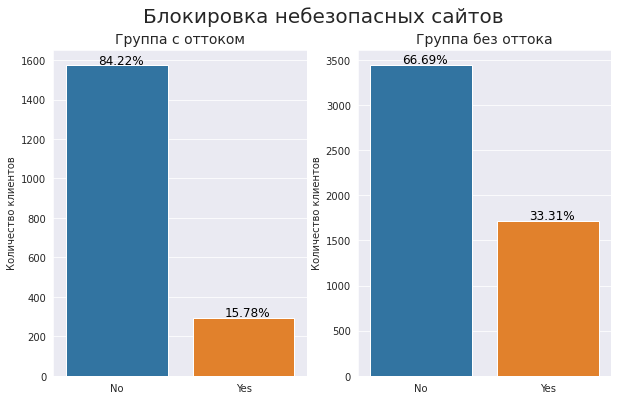

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Блокировка небезопасных сайтов', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "online_security", y = "n", data = os_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "online_security", y = "n", data = os_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком доля подключивших блокировку небезопасных сайтов составляет 15,8%. В группе без оттока - уже 33,3%.

##### online_backup — облачное хранилище файлов для резервного копирования данных

In [73]:
internet['online_backup'].value_counts(normalize = True)

No     0.559724
Yes    0.440276
Name: online_backup, dtype: float64

Облачным хранилищем пользуется 44% клиентов.

In [74]:
ob_c = churn_clients.groupby(by = 'online_backup').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
ob_nc = nonchurn_clients.groupby(by = 'online_backup').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

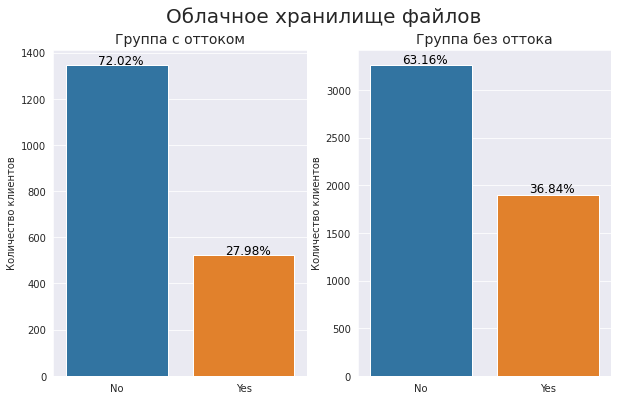

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Облачное хранилище файлов', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "online_backup", y = "n", data = ob_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "online_backup", y = "n", data = ob_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком доля подключивших услугу облачного хранилища файлов составляет 28%. В группе без оттока - почти 37%.

##### device_protection — антивирус

In [76]:
df['device_protection'].value_counts(normalize = True)

No     0.656143
Yes    0.343857
Name: device_protection, dtype: float64

34,4% клиентов пользуются антивирусом.

In [77]:
dp_c = churn_clients.groupby(by = 'device_protection').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
dp_nc = nonchurn_clients.groupby(by = 'device_protection').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

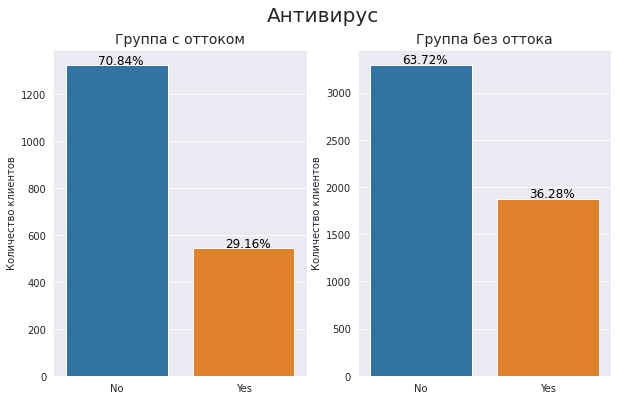

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Антивирус', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "device_protection", y = "n", data = dp_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "device_protection", y = "n", data = dp_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком антивирусом пользуется 29% клиентов. В группе без оттока - 36%.

##### tech_support — выделенная линия технической поддержки

In [79]:
df['tech_support'].value_counts(normalize = True)

No     0.709898
Yes    0.290102
Name: tech_support, dtype: float64

29% клиентов пользуются выделенной линией технической поддержки.

In [80]:
ts_c = churn_clients.groupby(by = 'tech_support').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
ts_nc = nonchurn_clients.groupby(by = 'tech_support').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

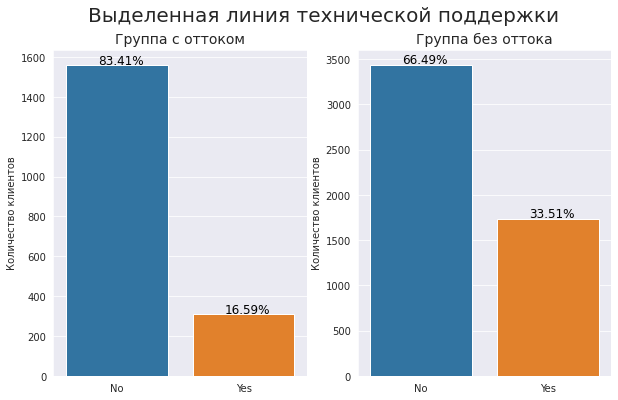

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Выделенная линия технической поддержки', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "tech_support", y = "n", data = ts_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "tech_support", y = "n", data = ts_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе без оттока доля клиентов, подключивших выделенную линию технической поддержки, существенно выше: 33,5% против 16,6% в группе с оттоком.

##### streaming_tv — стриминговое телевидение

In [82]:
df['streaming_tv'].value_counts(normalize = True)

No     0.615614
Yes    0.384386
Name: streaming_tv, dtype: float64

38,4% клиентов подключили стриминговое телевидение.

In [83]:
tv_c = churn_clients.groupby(by = 'streaming_tv').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
tv_nc = nonchurn_clients.groupby(by = 'streaming_tv').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

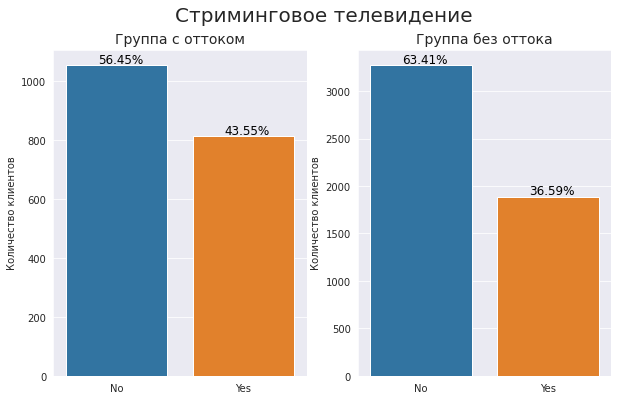

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Стриминговое телевидение', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "streaming_tv", y = "n", data = tv_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "streaming_tv", y = "n", data = tv_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком стриминговое телевидение подключили 43,5% клиентов, а в группе без оттока - 36,6%.

##### streaming_movies — каталог фильмов

In [85]:
df['streaming_movies'].value_counts(normalize = True)

No     0.611633
Yes    0.388367
Name: streaming_movies, dtype: float64

Каталог фильмов подключен у 38,8% пользователей.

In [86]:
sm_c = churn_clients.groupby(by = 'streaming_movies').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
sm_nc = nonchurn_clients.groupby(by = 'streaming_movies').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

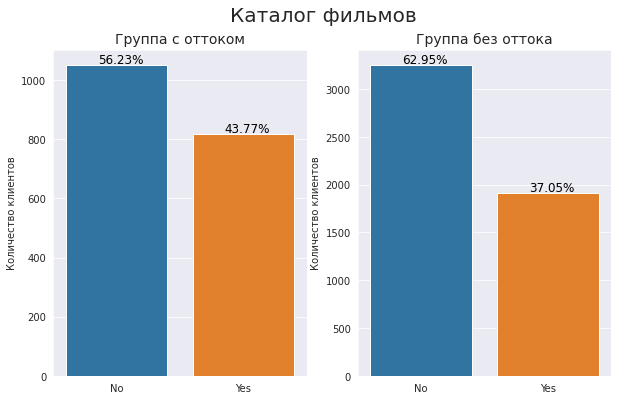

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Каталог фильмов', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "streaming_movies", y = "n", data = sm_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "streaming_movies", y = "n", data = sm_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком каталогом фильмов пользуются 43,8% клиентов, а в группе без оттока - 37%.

##### multiple_lines — подключен ли телефонный аппарат к нескольким линиям одновременно

In [88]:
df['multiple_lines'].value_counts(normalize = True)

No          0.481371
Yes         0.421928
No_phone    0.096701
Name: multiple_lines, dtype: float64

48% клиентов подключены к нескольким линиям одновременно.

In [89]:
ml_c = churn_clients.groupby(by = 'multiple_lines').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})
ml_nc = nonchurn_clients.groupby(by = 'multiple_lines').agg({'customer_id' : 'count'}).reset_index()\
                         .rename(columns = {'customer_id':'n'})

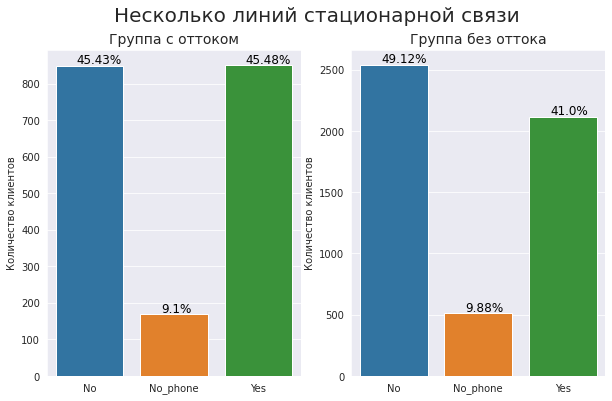

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

fig.suptitle('Несколько линий стационарной связи', fontsize = 20)

fig1 = sns.barplot(ax = axes[0], x = "multiple_lines", y = "n", data = ml_c) 
fig1.set_title("Группа с оттоком", fontsize = 14)
fig1.set_ylabel("Количество клиентов", fontsize = 10)
fig1.set_xlabel("")
show_percent(fig1, 0.25, 5)

fig2 = sns.barplot(ax = axes[1], x = "multiple_lines", y = "n", data = ml_nc) 
fig2.set_title("Группа без оттока", fontsize = 14)
fig2.set_ylabel("Количество клиентов", fontsize = 10)
fig2.set_xlabel("")
show_percent(fig2, 0.25, 20)

plt.show()

В группе с оттоком доля пользователей, подключенных к нескольким линиям, выше: 45,5% против 41% в группе без оттока.

### Кодирование переменных

Посмотрим еще раз на датафрейм:

In [91]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No_phone,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No_phone,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,1


Чтобы иметь возможность обучить модель, предпочтительнее перевести значения столбцов в числовую форму. Сначала заменим на единицы и нули признаки, приимающие только два значения:

In [92]:
def to_bin(s):
    if s == "Yes":
        return 1
    if s == "No":
        return 0

In [93]:
df_mod = df.copy()

In [94]:
bins = ['paperless_billing', 'partner', 'dependents', 'online_security', 'online_backup', 'device_protection',\
          'tech_support', 'streaming_tv', 'streaming_movies']

In [95]:
for col in bins:
    df_mod[col] = df_mod[col].apply(lambda x: to_bin(x))

То же самое проделаем в отношении столбца **gender**:

In [96]:
df_mod['gender'] = df_mod['gender'].apply(lambda x: 1 if x == 'Male' else 0)

Столбцы **type**, **payment_method**, **internet_service** и **multiple_lines** имеют более двух значений, поэтому воспользуемся прямым кодированием. Чтобы избавиться от линейной зависимости получившихся столбцов, удалим по одной колонке с помощью параметра *drop_first*:

In [97]:
df_mod = pd.get_dummies(df_mod, 
                           columns = ['type', 'payment_method', 'internet_service', 'multiple_lines'], drop_first = True)

In [98]:
df_mod.columns = df_mod.columns.str.lower()
df_mod.head()

,customer_id,begin_date,end_date,paperless_billing,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn,type_one year,type_two year,payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check,internet_service_fiber optic,internet_service_no,multiple_lines_no_phone,multiple_lines_yes
0,7590-VHVEG,2020-01-01,No,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5575-GNVDE,2017-04-01,No,0,56.95,1889.50,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,1,53.85,108.15,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,7795-CFOCW,2016-05-01,No,0,42.30,1840.75,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,1,70.70,151.65,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


### Удаление столбцов

Избавимся от ненужных столбцов. 

Во-первых, ID клиента точно не связан с целевой переменной и будет лишним в модели. Во-вторых, удалим столбцы, отвечающие за начало и конец действия договора, заменив их на новый **lifetime** - продолжительность "жизни" клиента. Для этого найдем разность в днях между датами. Для клиентов, которые не попали в отток, конечной датой будет 01.02.2020 - число, на которое получена актуальная информация.

In [99]:
df_mod.loc[df_mod['end_date'] == 'No', 'end_date'] = '2020-02-01'

In [100]:
df_mod['lifetime'] = (pd.to_datetime(df_mod['end_date']) - pd.to_datetime(df_mod['begin_date'])).dt.days

In [101]:
df_mod = df_mod.drop(['customer_id', 'begin_date', 'end_date'] , axis = 1)

In [102]:
df_mod.head()

,paperless_billing,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn,type_one year,type_two year,payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check,internet_service_fiber optic,internet_service_no,multiple_lines_no_phone,multiple_lines_yes,lifetime
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,31
1,0,56.95,1889.50,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1036
2,1,53.85,108.15,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,61
3,0,42.30,1840.75,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1371
4,1,70.70,151.65,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,61


Теперь все признаки представлены в числовом формате.

### Корреляция признаков

Проверим, есть ли среди признаков коллинеарные. Если таковые найдутся, примем решение об исключении их из датасета, чтобы не утяжелять модель.

Так как матрица корреляции подходит для оценки только количественных переменных, возьмем соответствующую часть датафрейма:

In [103]:
df_mod_num = df_mod[['lifetime', 'monthly_charges', 'total_charges']]
feat_num = ['продолжительность "жизни"', 'ежемесячные траты', 'суммарные траты']
cmn = df_mod_num.corr()

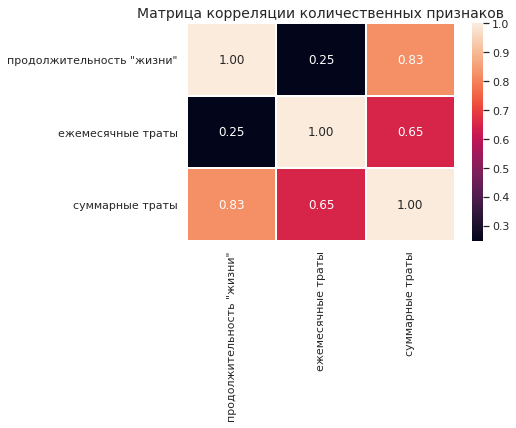

In [104]:
sns.set(style = 'white')
plt.figure(figsize = (6, 4))
plt.title('Матрица корреляции количественных признаков', fontsize = 14)
ax = sns.heatmap(cmn, annot = True, linewidths = 1, linecolor = 'white', fmt = '.2f', xticklabels = feat_num,\
                 yticklabels = feat_num)
plt.xticks(rotation = 90) 
plt.show()

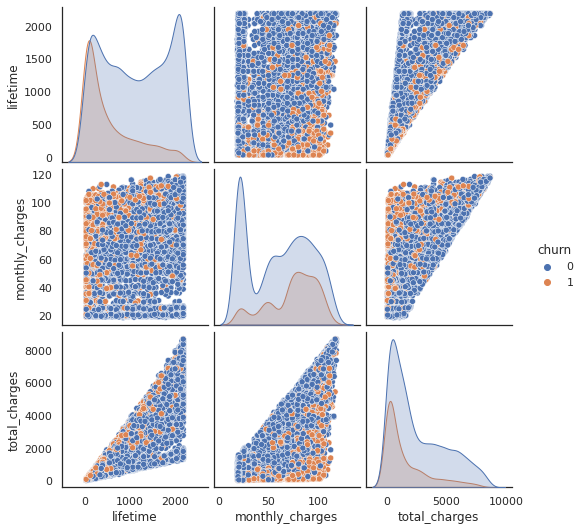

In [105]:
df_mod_num = df_mod[['lifetime', 'monthly_charges', 'total_charges', 'churn']]
sns.pairplot(df_mod_num, height = 2.5, hue = 'churn')
plt.show()

Ожидаемо видна высокая корреляция между продолжительностью "жизни" клиента и общей суммой комиссий, которую он заплатил за все время оператору. Также имеет место довольно сильная зависимость между ежемесячной платой и общей суммой комиссий.

Для отображения взаимосвязей между категориальными признаками воспользуемся коэффициентом Крамера. Функция позаимствована с сайта [https://towardsdatascience.com/](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). 


In [106]:
# функция вычисляет статистику Cramers V для категориальных переменных x и y на основе критерия Пирсона;
# это аналог коэффицента корреляции

def cramers(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

Вычислим коэффициенты взаимосвязи для каждой пары переменных и отразим на тепловой карте:

In [107]:
df_mod_cat = df_mod.drop(['lifetime', 'monthly_charges', 'total_charges'], axis = 1)
feat_cat = ['безналичная оплата', 'пол', 'пенсионный статус', 'наличие супруга', 'иждивенцы', 'блокировка опасных сайтов', 'облачное хранилище',
           'антивирус', 'техподдержка', 'стриминговое ТВ', 'каталог фильмов', 'отток', 'однолетний договор', 
            'двухлетний договор', 'оплата кредитной картой', 'оплата электронным чеком','оплата чеком по почте',
            'оптоволоконное подключение','не пользуется услугой "интернет"','не пользуется телефонией', 'несколько линий'] 

In [108]:
hm = [[0 for i in range(len(df_mod_cat.columns))] for j in range(len(df_mod_cat.columns))]
for i in range(len(df_mod_cat.columns)):
    for j in range(len(df_mod_cat.columns)):
        hm[i][j] = cramers(df_mod_cat[df_mod_cat.columns[i]], df_mod_cat[df_mod_cat.columns[j]])

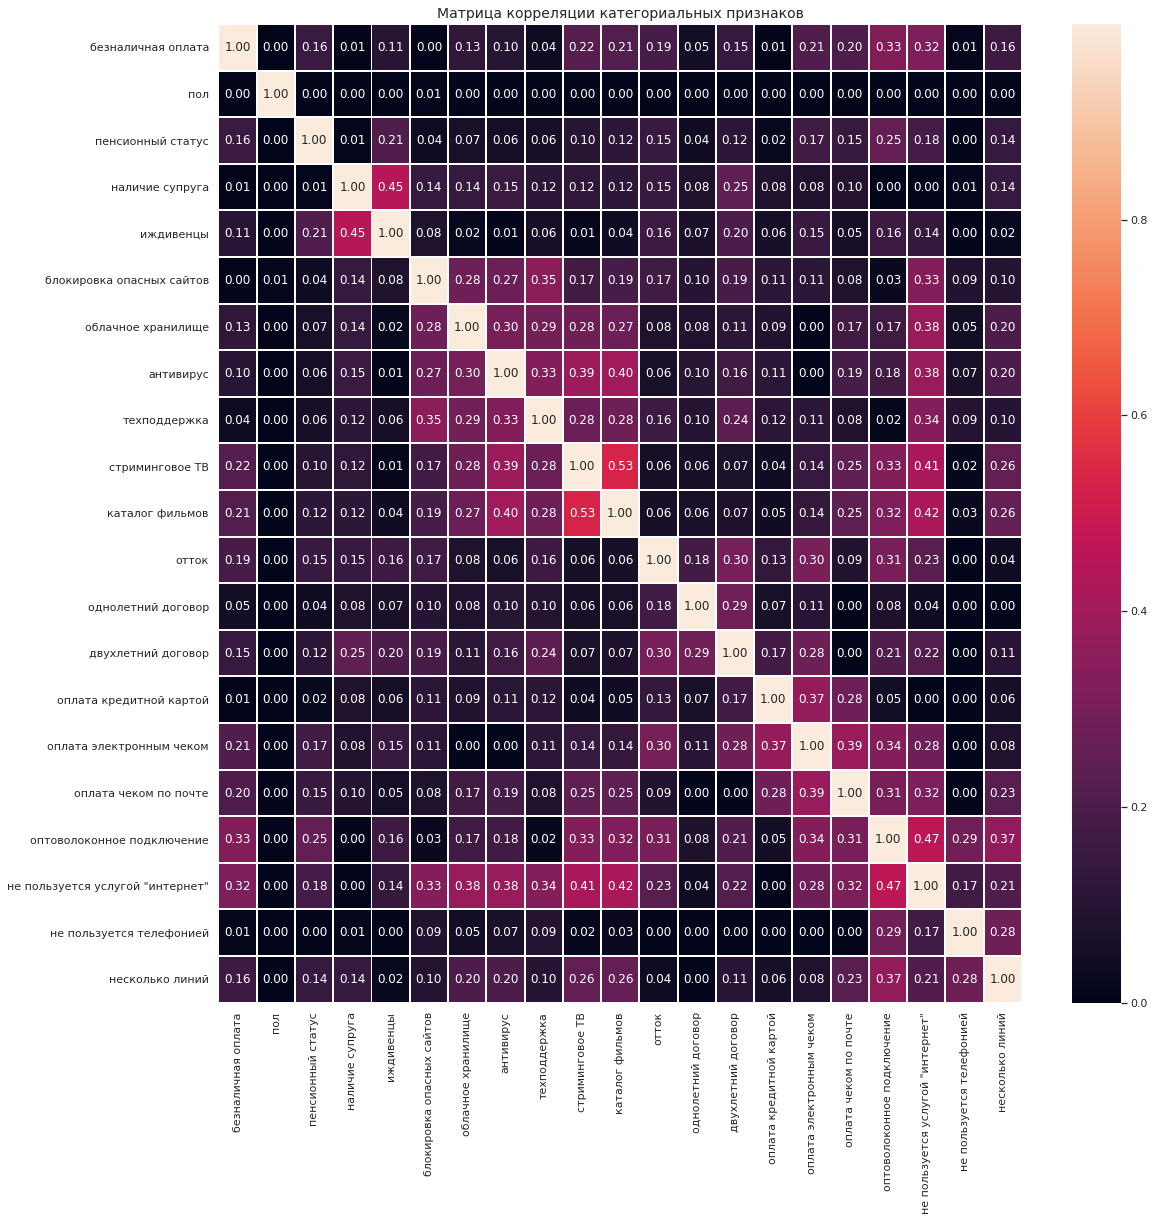

In [109]:
sns.set(style = 'white')
plt.figure(figsize = (18, 18))
plt.title('Матрица корреляции категориальных признаков', fontsize = 14)
ax = sns.heatmap(hm, annot = True, linewidths = 1, linecolor = 'white', fmt = '.2f', xticklabels = feat_cat,\
                 yticklabels = feat_cat)
plt.xticks(rotation = 90) 
plt.show()

Можно выделить всего несколько умеренно связанных переменных. Во-первых, это признаки, которые были выделены из одного столбца в результате прямого кодирования (способ оплаты, тип подключения к интернету). Во-вторых, это довольно логичные связи между наличием супруга и иждивенцев (детей), а также подключением стримингового ТВ и каталога фильмов. Все прочие взаимосвязи относительно слабые.

Чтобы упростить работу модели, удалим следующие признаки:
- общую сумму затрат (высокая корреляция с ежемесячными тратами и продолжительностью "жизни" клиента);
- каталог фильмов (корреляция со стриминговым ТВ);
- наличие иждивенцев (корреляция с наличием партнера).

In [110]:
df_fin = df_mod.copy()
df_fin = df_fin.drop(['total_charges', 'streaming_movies', 'dependents'], axis = 1)

In [111]:
df_fin.head()

,paperless_billing,monthly_charges,gender,senior_citizen,partner,online_security,online_backup,device_protection,tech_support,streaming_tv,churn,type_one year,type_two year,payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check,internet_service_fiber optic,internet_service_no,multiple_lines_no_phone,multiple_lines_yes,lifetime
0,1,29.85,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,31
1,0,56.95,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1036
2,1,53.85,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,61
3,0,42.30,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1371
4,1,70.70,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,61


### Разбивка данных на выборки

Целевой признак в рассматриваемой задаче - это показатель оттока:

In [112]:
target = df_fin['churn']
features = df_fin.drop('churn', axis = 1)

Разделим данные на обучающую и тестовую выборки в пропорции 80:20 соответственно:

In [113]:
features_train, features_test, target_train, target_test = \
                                    train_test_split(features, target, test_size = 0.2, random_state = 42)

Размерность выборок удовлетворяет указанным выше пропорциям:

In [114]:
display(features_train.shape, target_train.shape[0])
display(features_test.shape, target_test.shape[0])

(5625, 20)

5625

(1407, 20)

1407

### Масштабирование признаков

Рассматриваемые переменные имеют разный масштаб. Чтобы модель корректно проводила оценку параметров, настроим стандартизацию количественных признаков на обучающей выборке и преобразуем все выборки:

In [115]:
numeric = ['monthly_charges', 'lifetime']

In [116]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Вывод

Проведены предварительный анализ и подготовка данных:

- таблицы объединены в один датафрейм, пропуски заполнены;
- дубликаты отсутствуют;
- удалены как неинформативные 11 строк с клиентами, только что заключившими договор;
- проведен исследовательский анализ каждого признака в разрезе целевой переменной:
    - группа клиентов в оттоке составляет 26% от всей выборки;
    - сильнее всего для групп с оттоком и без отличаются персональные данные клиентов (за исключением пола) и характеристики договора:
        - в группе с оттоком выше доля пенсионеров (на 12,5%), клиентов без партнера (на 17%), клиентов с иждивенцами (на 17%);
        - в группе с оттоком преимущественно заключаются бессрочные договоры, оплата чаще всего происходит посредством электронного чека, ежемесячная абонентская плата выше (74 против 61 у.е.), но при этом суммарный доход ниже (1531 против 2555 у.е.), чем в группе без оттока;
    - имеет место и влияние подключенных услуг: в группе без оттока доля пользующихся той или иной интернет-услугой существенно (на 7-18%) выше. Слабее всего влияют наличие стримингового телевидения и каталога фильмов;  
- признаки закодированы;
- удалены столбцы **customer_id**, **begin_date**, **end_date**. Вместо двух последних рассчитана новая переменная - продолжительность "жизни" клиента **lifetime**;
- рассчитаны коэффициенты корреляции между переменными. Чтобы упростить работу модели, удалены следующие признаки:
    - общую сумму затрат (высокая корреляция с ежемесячными тратами и продолжительностью "жизни" клиента);
    - каталог фильмов (корреляция со стриминговым ТВ);
    - наличие иждивенцев (корреляция с наличием партнера);
- данные разбиты на обучающую и тестовую выборки в пропорции 80:20;
- небинарные признаки масштабированы.

## Обучение моделей

Будем сравнивать работу следующих моделей:
- линейной регрессии;
- дерева решений;
- случайного леса;
- CatBoost;
- LightGBM.

Функция для поиска оптимального набора гиперпараметров моделей по метрике ROC-AUC (внутри применяется *GridSearchCV*, поэтому валидационную выборку отдельно не используем):

In [117]:
def grid_search(model, params, features, target):
    
    auc_roc = make_scorer(roc_auc_score, greater_is_better = True)
    g_search = GridSearchCV(model, params, scoring = auc_roc, n_jobs = -1)
    g_search.fit(features, target)
    
    print('Лучший набор гиперпараметров:', g_search.best_params_)
    print('Качество предсказания:', round(g_search.best_score_, 5)) 
    print('Лучшая модель:', g_search.best_estimator_)
    return g_search.best_estimator_

Функция для оценки качества результатов работы модели:

In [118]:
# обучает модель на тренировочной выборке и оценивает качество метрикой ROC-AUC на тестовой, результаты записывает в таблицу
# дополнительно считает accuracy, F1, precision и recall

def model_result(model, features_train, features_test, target_train, target_test, df_result):

    model.fit(features_train, target_train)
    predicted = model.predict(features_test)
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]

    auc_roc = roc_auc_score(target_test, probabilities_one_test).round(5)
    accuracy = accuracy_score(target_test, predicted).round(5)
    f1 = f1_score(target_test, predicted).round(5)
    precision = precision_score(target_test, predicted).round(5)
    recall = recall_score(target_test, predicted).round(5)
    
    print('ROC-AUC на тестовой выборке:', auc_roc)
    print('Accuracy на тестовой выборке:', accuracy)
    
    df_result.append({'model': model.__class__.__name__, 'ROC-AUC': auc_roc, 'Accuracy': accuracy, 'F1': f1, 
                     'Precision': precision, 'Recall': recall,})

Обучим несколько разных моделей на тренировочных выборкахи оценим их качество на тестовой. Записывать результаты будем в отдельную таблицу.

In [119]:
result = []

### Логистическая регрессия

В качестве гиперпараметра выберем значение обратной регуляризации. Помня о дисбалансе классов, воспользуемся параметром *class_weight*:

In [120]:
lr_model = LogisticRegression(random_state = 42, solver = 'liblinear', class_weight = 'balanced')
lr_params = {'C' : range(1, 10, 1)}

In [121]:
%%time
lr_best = grid_search(lr_model, lr_params, features_train, target_train)

Лучший набор гиперпараметров: {'C': 8}
Качество предсказания: 0.76914
Лучшая модель: LogisticRegression(C=8, class_weight='balanced', random_state=42,
                   solver='liblinear')
CPU times: user 5.07 s, sys: 3.99 s, total: 9.06 s
Wall time: 9.05 s


Проверим работу линейной регрессии с оптимальными гиперпараметрами на тестовой выборке:

In [122]:
model_result(lr_best, features_train, features_test, target_train, target_test, result)

ROC-AUC на тестовой выборке: 0.8313
Accuracy на тестовой выборке: 0.73703


In [123]:
pd.DataFrame(result)

,model,ROC-AUC,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.8313,0.73703,0.61538,0.5034,0.79144


Задачу-минимум логистическая регрессия выполнила, но ожидаемого значения ROC-AUC (более 0,88) не достигла.

### Модель решающего дерева

В качестве гиперпараметра возьмем глубину дерева:

In [124]:
dt_model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
dt_params = {'max_depth' : range(1, 10, 1)}

In [125]:
%%time
dt_best = grid_search(dt_model, dt_params, features_train, target_train)

Лучший набор гиперпараметров: {'max_depth': 6}
Качество предсказания: 0.77027
Лучшая модель: DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)
CPU times: user 806 ms, sys: 0 ns, total: 806 ms
Wall time: 824 ms


In [126]:
model_result(dt_best, features_train, features_test, target_train, target_test, result)

ROC-AUC на тестовой выборке: 0.84518
Accuracy на тестовой выборке: 0.75551


In [127]:
pd.DataFrame(result)

,model,ROC-AUC,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.83130,0.73703,0.61538,0.5034,0.79144
1,DecisionTreeClassifier,0.84518,0.75551,0.62031,0.5282,0.75134


Дерево решений отработало немного лучше логистической регрессии по обеим метрикам, но нужных значений так и не добилось.

### Модель случайного леса

В качестве гиперпараметров будем использовать глубину дерева, а также число деревьев:

In [128]:
rf_model = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
rf_params = {'max_depth' : range(1, 12, 1), 'n_estimators' : range(20, 30, 1)}

In [129]:
%%time
rf_best = grid_search(rf_model, rf_params, features_train, target_train)

Лучший набор гиперпараметров: {'max_depth': 8, 'n_estimators': 22}
Качество предсказания: 0.77784
Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=22,
                       random_state=42)
CPU times: user 58 s, sys: 220 ms, total: 58.2 s
Wall time: 58.9 s


In [130]:
model_result(rf_best, features_train, features_test, target_train, target_test, result)

ROC-AUC на тестовой выборке: 0.8434
Accuracy на тестовой выборке: 0.74556


In [131]:
pd.DataFrame(result)

,model,ROC-AUC,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.83130,0.73703,0.61538,0.50340,0.79144
1,DecisionTreeClassifier,0.84518,0.75551,0.62031,0.52820,0.75134
2,RandomForestClassifier,0.84340,0.74556,0.60917,0.51476,0.74599


Качество работы модели случайного леса сравнимо с качеством дерева решений.

### CatBoost

В качестве гиперпараметров снова выберем глубину деревьев и их число:

In [132]:
catboost_model = CatBoostClassifier(random_state = 42, scale_pos_weight = 3, silent = True)
catboost_params = {'n_estimators': range(100, 131, 10), 'max_depth': range(1, 8)}

In [133]:
%%time
cb_best = grid_search(catboost_model, catboost_params, features_train, target_train)

Лучший набор гиперпараметров: {'max_depth': 5, 'n_estimators': 120}
Качество предсказания: 0.81785
Лучшая модель: <catboost.core.CatBoostClassifier object at 0x7fc0304927c0>
CPU times: user 39.3 s, sys: 2.19 s, total: 41.5 s
Wall time: 2min 43s


Оценим качество предсказания модели CatBoost:

In [134]:
model_result(cb_best, features_train, features_test, target_train, target_test, result)

ROC-AUC на тестовой выборке: 0.89014
Accuracy на тестовой выборке: 0.79673


In [135]:
pd.DataFrame(result)

,model,ROC-AUC,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.83130,0.73703,0.61538,0.50340,0.79144
1,DecisionTreeClassifier,0.84518,0.75551,0.62031,0.52820,0.75134
2,RandomForestClassifier,0.84340,0.74556,0.60917,0.51476,0.74599
3,CatBoostClassifier,0.89014,0.79673,0.67277,0.58800,0.78610


CatBoost с оптимальными гиперпараметрами смог достигнуть необходимого результата. Accuracy также выше, чем у предыдущих моделей.

### LightGBM

И вновь качестве гиперпараметров возьмем число деревьев и их максимальную глубину:

In [136]:
lgb_model = LGBMClassifier(random_state = 42, scale_pos_weight = 3)
lgb_params = {'n_estimators': range(800, 901, 25), 'max_depth': range(1, 5)}

In [137]:
%%time
lgb_best = grid_search(lgb_model, lgb_params, features_train, target_train)

Лучший набор гиперпараметров: {'max_depth': 3, 'n_estimators': 875}
Качество предсказания: 0.84074
Лучшая модель: LGBMClassifier(max_depth=3, n_estimators=875, random_state=42,
               scale_pos_weight=3)
CPU times: user 5min 33s, sys: 3.38 s, total: 5min 37s
Wall time: 5min 41s


Качество предсказания LightGBM:

In [138]:
model_result(lgb_best, features_train, features_test, target_train, target_test, result)

ROC-AUC на тестовой выборке: 0.90696
Accuracy на тестовой выборке: 0.83937


Итоговая таблица выглядит следующим образом:

In [139]:
pd.DataFrame(result)

,model,ROC-AUC,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.83130,0.73703,0.61538,0.50340,0.79144
1,DecisionTreeClassifier,0.84518,0.75551,0.62031,0.52820,0.75134
2,RandomForestClassifier,0.84340,0.74556,0.60917,0.51476,0.74599
3,CatBoostClassifier,0.89014,0.79673,0.67277,0.58800,0.78610
4,LGBMClassifier,0.90696,0.83937,0.72771,0.66228,0.80749


Модель LGB улучшила ROC-AUC еще на 0,016, а Accuracy - на 0,043.

Изобразим ROC-кривые на общем графике:

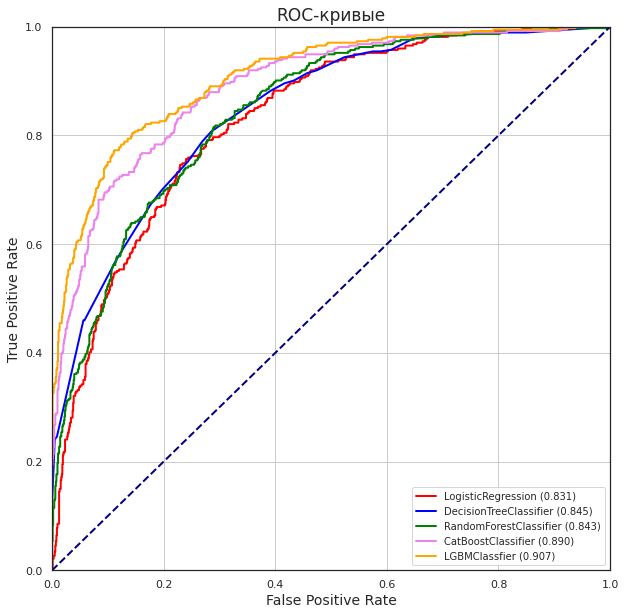

In [140]:
plt.figure(figsize=(10, 10))

prob_lr = lr_best.predict_proba(features_test)[:,1]
prob_dt = dt_best.predict_proba(features_test)[:,1]
prob_rf = rf_best.predict_proba(features_test)[:,1]
prob_cb = cb_best.predict_proba(features_test)[:,1]
prob_lgb = lgb_best.predict_proba(features_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(target_test, prob_lr)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(target_test, prob_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, prob_rf)
fpr_cb, tpr_cb, thresholds_cb = roc_curve(target_test, prob_cb)
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(target_test, prob_lgb)
plt.plot(fpr_lr, tpr_lr, color = 'red',
        lw = 2, label = 'LogisticRegression (%0.3f)' % roc_auc_score(target_test, prob_lr))
plt.plot(fpr_dt, tpr_dt, color = 'blue',
        lw = 2, label = 'DecisionTreeClassifier (%0.3f)' % roc_auc_score(target_test, prob_dt))
plt.plot(fpr_rf, tpr_rf, color = 'green',
        lw = 2, label = 'RandomForestClassifier (%0.3f)' % roc_auc_score(target_test, prob_rf))
plt.plot(fpr_cb, tpr_cb, color = 'violet',
        lw = 2, label = 'CatBoostClassifier (%0.3f)' % roc_auc_score(target_test, prob_cb))
plt.plot(fpr_lgb, tpr_lgb, color = 'orange',
        lw = 2, label = 'LGBMClassfier (%0.3f)' % roc_auc_score(target_test, prob_lgb))

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize= 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('ROC-кривые', fontsize = 17)
plt.legend(fontsize = 10)
plt.grid()
plt.show()

### Влияние признаков

Оценим, какие признаки сильнее всего оказывают влияние на целевую переменную в лучшей из построенных моделей - LightGBM.

In [141]:
# график сравнения влияния признаков

def draw_feature_importance(model):
    df = pd.DataFrame(model, features_train.columns).reset_index()\
            .rename(columns = {'index' : 'features', 0 : 'importance'}).sort_values(by = 'importance', ascending = False)
    plt.figure(figsize=(13, 10), dpi = 60)
    ax = sns.barplot(x = 'importance', y = 'features', data = df)
    plt.title('Важность признаков', fontsize = 20)
    plt.ylabel("Признаки", fontsize = 10)
    plt.xlabel("Коэффициент", fontsize = 10)
    plt.grid()

In [142]:
feature_importances = (lgb_best.feature_importances_ / sum(lgb_best.feature_importances_)) * 100

LightGBM


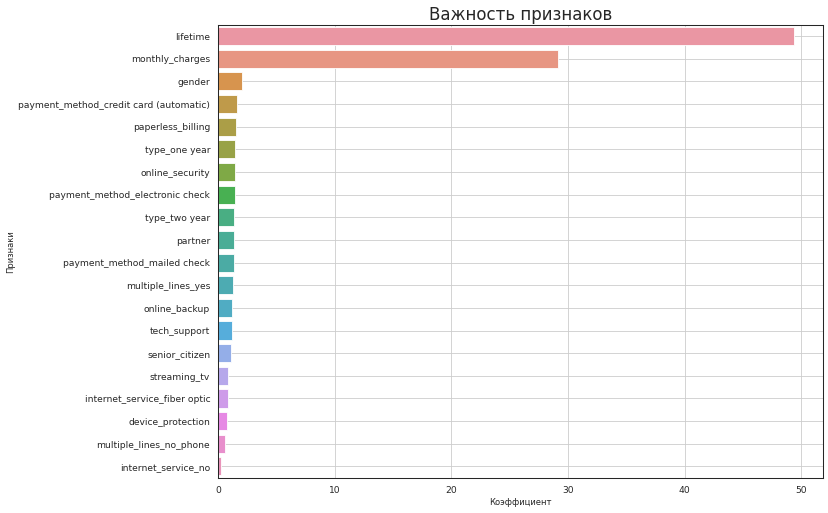

In [143]:
print('LightGBM')
draw_feature_importance(feature_importances)

Как видно, из всех факторов реально играют роль лишь два - продолжительность "жизни" и ежемесячные траты пользователей. Степень влияния остальных признаков в десятки раз меньше.

Построим модель с теми же параметрами, но только с двумя признаками - **lifetime** и **monthly_charges** - и оценим ее работу.

In [144]:
df_fimp = df_fin[['lifetime', 'monthly_charges', 'churn']]

In [145]:
targ_fimp = df_fimp['churn']
feat_fimp = df_fimp.drop('churn', axis = 1)

Разделим данные на обучающую и тестовую выборки в пропорции 80:20 соответственно:

In [146]:
features_train_fimp, features_test_fimp, target_train_fimp, target_test_fimp = \
                                    train_test_split(feat_fimp, targ_fimp, test_size = 0.2, random_state = 42)

In [147]:
scaler = StandardScaler()
scaler.fit(features_train_fimp)

features_train_fimp = scaler.transform(features_train_fimp)
features_test_fimp = scaler.transform(features_test_fimp)

In [148]:
model_result(lgb_best, features_train_fimp, features_test_fimp, target_train_fimp, target_test_fimp, result)

ROC-AUC на тестовой выборке: 0.9051
Accuracy на тестовой выборке: 0.83511


In [149]:
pd.DataFrame(result)

,model,ROC-AUC,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.83130,0.73703,0.61538,0.50340,0.79144
1,DecisionTreeClassifier,0.84518,0.75551,0.62031,0.52820,0.75134
2,RandomForestClassifier,0.84340,0.74556,0.60917,0.51476,0.74599
3,CatBoostClassifier,0.89014,0.79673,0.67277,0.58800,0.78610
4,LGBMClassifier,0.90696,0.83937,0.72771,0.66228,0.80749
5,LGBMClassifier,0.90510,0.83511,0.71429,0.66210,0.77540


Действительно, на датасете с двумя признаками модель получила практически те же значения ROC-AUC и accuracy, однако слегка потеряла в recall и, соответственно, F1. Так как в этой задаче требуется добиться максимального значения именно ROC-AUC, то   результат можно назвать приемлемым, учитывая, что время обучения и работы на датасете с двумя признаками существенно ниже.

Проверим, какие признаки являются существенными для других моделей.

Для логистической регрессии:

Логистическая регрессия


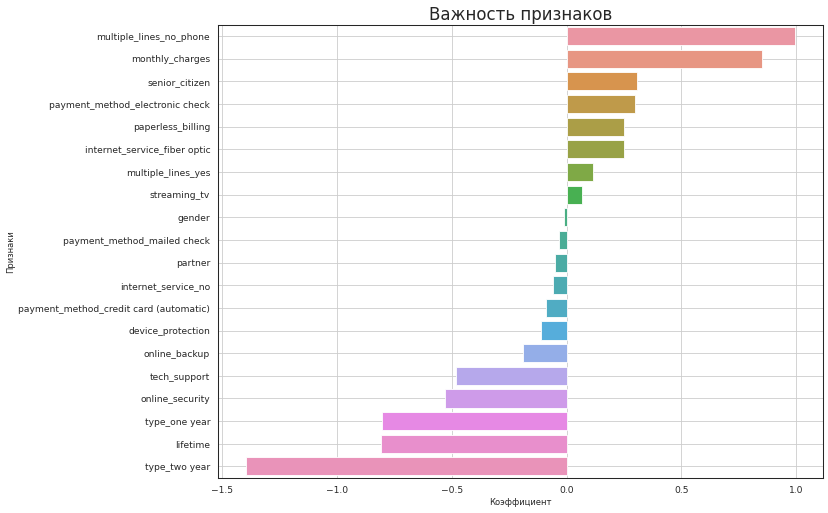

In [150]:
print('Логистическая регрессия')
draw_feature_importance(lr_best.coef_[0])

Логистическая регрессия использует практически все признаки. Ежемесячные траты и продолжительность "жизни" клиента оказывают существенное влияние, однако не наибольшее. Самым важным оказался признак срока договора (как на два, так и на один год), а также отсутствие услуги телефонии.

Решающее дерево


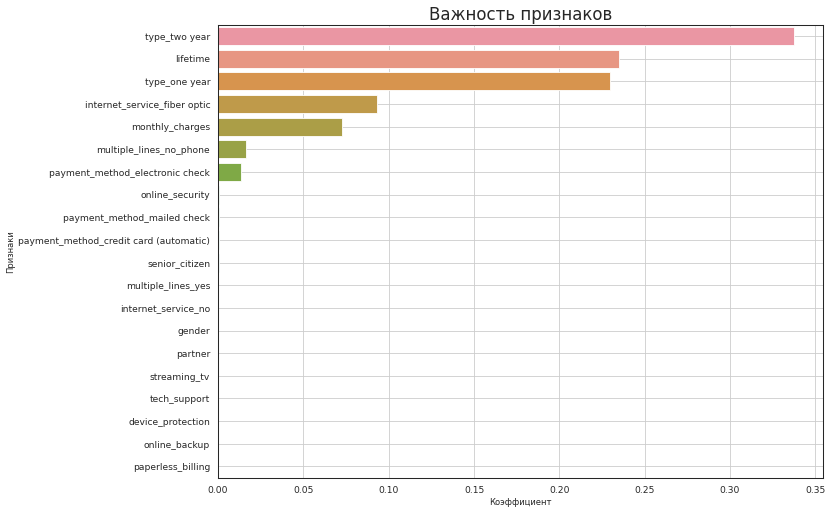

In [151]:
print('Решающее дерево')
draw_feature_importance(dt_best.feature_importances_)

Для решающего дерева также самыми важными признаками оказались срок договора и продолжительность "жизни" клиента. В меньшей степени влияют факторы подключения по оптоволокну и ежемесячные траты. 13 признаков вообще незначимы.

Случайный лес


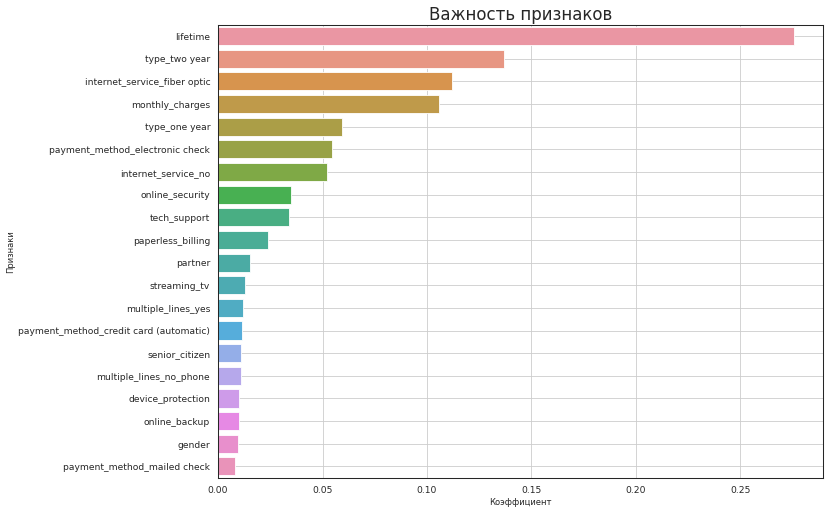

In [152]:
print('Случайный лес')
draw_feature_importance(rf_best.feature_importances_)

Для случайного леса все основные параметры те же: продолжительность "жизни" (существенно более значим по сравнению с остальными), срок договора, оптоволоконное подключение. Также относительно значимыми оказались оплата электронным чеком, отсутствие услуги интернета, техподдержка и блокировка небезопасных сайтов. 

CatBoost


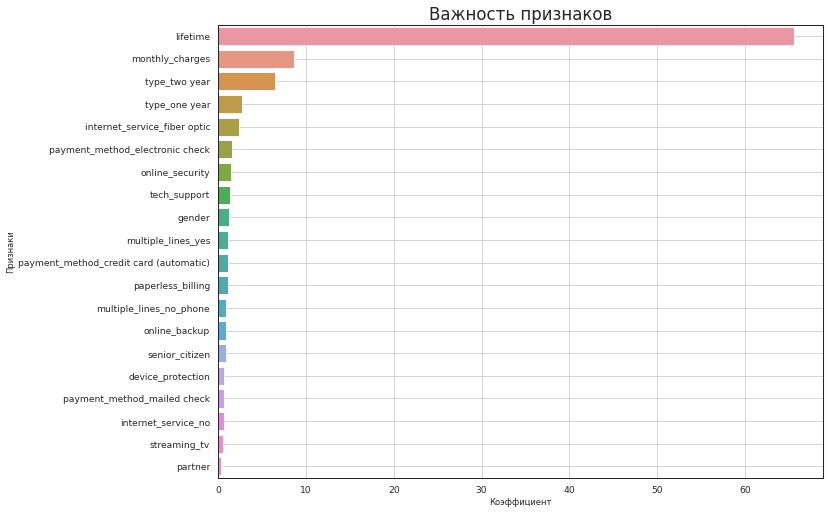

In [153]:
print('CatBoost')
draw_feature_importance(cb_best.feature_importances_)

Для модели CatBoost практически единственным значимым признаком оказалась продолжительность "жизни" клиента. Небольшую роль играют ежемесячные траты и срок договора. 

## Вывод

Построены и обучены следующие модели:
- линейной регрессии;
- дерева решений;
- случайного леса;
- CatBoost;
- LightGBM.

Для обучения и оценки моделей датасет разбит на обучающую и тестовую выборки в пропорции 3:1. 

Для каждой модели с помощью функции GridSerchCV подбиралиись оптимальные гиперпараметры: для логистической регрессии - значение обратной регуляризации, для решающего дерева - его глубина. Для остальных моделей - глубина и число деревьев.

Модели с оптимальными гиперпараметрами обучены на тренировочной и проверены на тестовой выборке. Сравнение моделей и значимости признаков приведено в заключительном разделе.

## Анализ моделей

Посмотрим на итоговую таблицу:

In [154]:
pd.DataFrame(result).sort_values(by = 'ROC-AUC', ascending = False)

,model,ROC-AUC,Accuracy,F1,Precision,Recall
4,LGBMClassifier,0.90696,0.83937,0.72771,0.66228,0.80749
5,LGBMClassifier,0.90510,0.83511,0.71429,0.66210,0.77540
3,CatBoostClassifier,0.89014,0.79673,0.67277,0.58800,0.78610
1,DecisionTreeClassifier,0.84518,0.75551,0.62031,0.52820,0.75134
2,RandomForestClassifier,0.84340,0.74556,0.60917,0.51476,0.74599
0,LogisticRegression,0.83130,0.73703,0.61538,0.50340,0.79144


В таблице два результата модели LGBM: чуть менее высокий (разница ROC-AUC всего 0,0018) получился на датасете из всего двух основных признаков - продолжительности "жизни" клиента и его ежемесячных трат. Немного пожертвовав полнотой (разница 0,03), можно ускорить время обучения и работы модели, не потеряв в ключевой по условию метрике.

Лучшие результаты по качеству показали модели на основе градиентного бустинга. И ROC-AUC, и Accuracy немного выше у LightGBM (0,907 и 0,84 соответственно против 0,89 и 0,796 у CatBoost). Желательный результат (ROC-AUC >= 0,88) получен именно на этих моделях.

Модели, основанные на деревьях решений, дают менее высокое значение метрик. ROC-AUC у случайного леса составил 0,843, а у дерева решений - 0,845. 

Линейная регрессия уступает всем моделям и по качеству предсказаний (0,831), и по точности (0,737). 

Сравнение моделей по важности признаков показало, что для бустинговых моделей значимыми являются только два - продолжительность "жизни" клиента и его ежемесячные траты, причем для CatBoost ключевую роль играет именно продолжительность "жизни".

Фактор продолжительности "жизни" является одним из основных и для остальных моделей, однако количество важных переменных увеличивается: для решающего дерева их уже пять, случайного леса - девять, а логистическая регрессия использует почти все параметры. Ключевыми признаками наряду с уже упомянутыми являются срок договора, тип подключения (оптоволокно), отсутствие услуг телефонии и интернета, оплата электронным чеком, техподдержка и блокировка небезопасных сайтов. 


## Основные результаты

В работе решалась задача прогнозирования оттока клиентов оператора связи. Группа клиентов в оттоке составляет 26% от всей выборки.

В ходе предварительного анализа данных: 
- датасеты объединены, пропуски заполнены значениями, соответствующими неиспользованию клиентами указанных услуг;
- удалены как неинформативные 11 строк с клиентами, только что заключившими договор;
- исследовано влияние отдельных переменных на целевую:
    - сильнее всего для групп с оттоком и без отличаются персональные данные клиентов (за исключением пола) и характеристики договора:
        - в группе с оттоком выше доля пенсионеров (на 12,5%), клиентов без партнера (на 17%), клиентов с иждивенцами (на 17%);
        - в группе с оттоком преимущественно заключаются бессрочные договоры, оплата чаще всего происходит посредством электронного чека, ежемесячная абонентская плата выше (74 против 61 у.е.), но при этом суммарный доход ниже (1531 против 2555 у.е.), чем в группе без оттока;
    - имеет место и влияние подключенных услуг: в группе без оттока доля пользующихся той или иной интернет-услугой существенно (на 7-18%) выше. Слабее всего влияют наличие стримингового телевидения и каталога фильмов;
- рассчитаны коэффициенты корреляции между переменными и удалены следующие признаки:
    - общая сумма затрат (высокая корреляция с ежемесячными тратами и продолжительностью "жизни" клиента);
    - каталог фильмов (корреляция со стриминговым ТВ);
    - наличие иждивенцев (корреляция с наличием партнера).

Для решения задачи прогнозирования обучены и протестированы пять моделей: 
- линейной регрессии;
- дерева решений;
- случайного леса;
- CatBoost;
- LightGBM.

Датасет разделен на тренировочную и тестовую выборки в пропорции 4:1. Данные стандартизированы. В качестве метрики использовались ROC-AUC и Accuracy.

Для каждой модели с помощью функции GridSerchCV подбиралиись оптимальные гиперпараметры: для логистической регрессии - значение обратной регуляризации, для решающего дерева - его глубина. Для остальных моделей - глубина и число деревьев. Модели с оптимальными гиперпараметрами обучены на тренировочной и проверены на тестовой выборке. 

Линейная регрессия уступает всем моделям и по качеству предсказаний (ROC-AUC 0,831), и по точности (Accuracy 0,737).

Модели, основанные на деревьях решений, дают немного более высокое значение метрик. ROC-AUC у случайного леса составил 0,843, а у дерева решений - 0,845.

Лучшие результаты по качеству показали модели на основе градиентного бустинга. И ROC-AUC, и Accuracy немного лучше у LightGBM (0,907 и 0,84 соответственно против 0,89 и 0,796 у CatBoost). Желательный результат (ROC-AUC >= 0,88) получен именно на этих моделях.

Сравнение моделей по важности признаков показало, что для бустинговых моделей значимыми являются только два - продолжительность "жизни" клиента и его ежемесячные траты, причем для CatBoost ключевую роль играет только продолжительность "жизни".

Фактор продолжительности "жизни" является основным и для остальных моделей, однако количество важных переменных увеличивается: для решающего дерева их уже пять, случайного леса - девять, а логистическая регрессия использует почти все параметры. Ключевыми признаками наряду с уже упомянутыми являются срок договора, тип подключения (оптоволокно), отсутствие услуг телефонии и интернета, оплата электронным чеком, техподдержка и блокировка небезопасных сайтов. 

Результат работы лучшей модели (LGBM) на датасете с двумя признаками - продолжительности "жизни" клиента и его ежемесячных трат - уступил по ROC-AUC всего 0,0018 работе этой же модели на полном датасете. Немного пожертвовав полнотой (разница recall 0,03), можно ускорить время обучения и работы, не потеряв в ключевой по условию метрике.